# CART Decision Trees: Aggregated Tree Census Data 

#### Variables included in the analyses were selected in part due to relationships found during data exploration. 

Classification and Regression Trees (CART): The outcome (dependent) variable is categorical (although it could be continuous) and the predictor (independent) variables can be continuous or categorical variables (binary). The model creates binary split at deicision points to arrive at its final classifcation decision.

In [1]:
library(rpart)
library(rpart.plot)
library(ggplot2)
library(caret)

setwd("C:/Users/ear51/DAAN- Graduate School/Other Projects/Trees/Processed Data Files")
agg_data <- read.csv("Joined_aggregate_data.csv")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: lattice


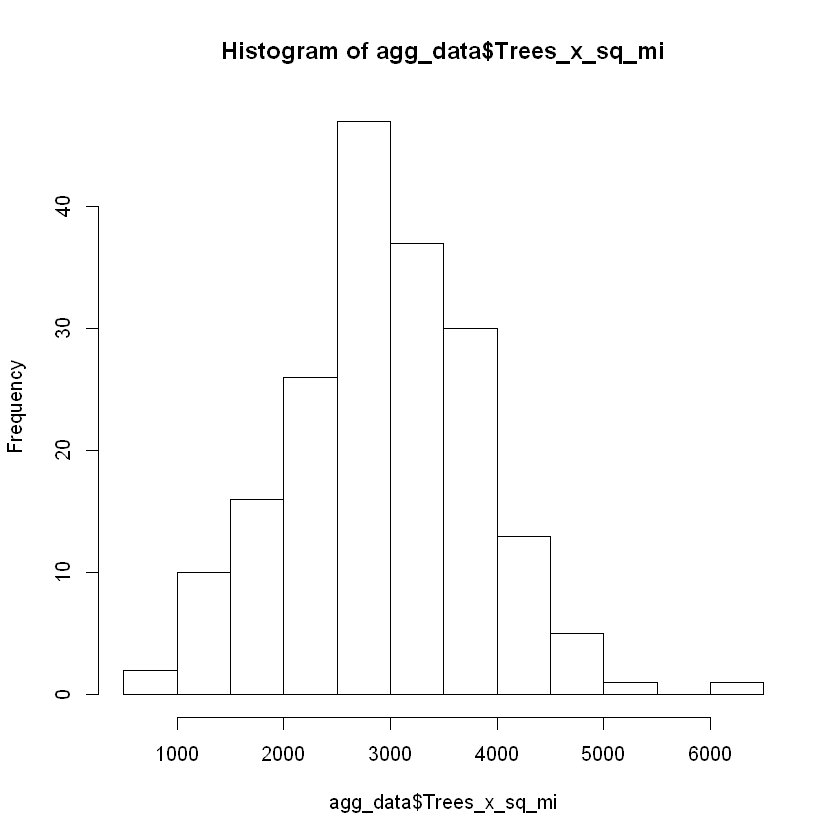

In [2]:
hist(agg_data$Trees_x_sq_mi)

#### Partition the tree density data into bins based on 25th percentile: low and not low

In [3]:
summary(agg_data$Trees_x_sq_mi)

agg_data$density_bins <- ifelse(agg_data$Trees_x_sq_mi >=2886.8 , "not_low", "low")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  718.4  2416.6  2886.8  2944.5  3578.2  6492.6 

#### Build CART model.

In [4]:
cart_1 <- rpart(density_bins ~ SelfEmployed + Hosp_Adults_Avg_Yr_Rate_per_10K + Construction + Production + Transit + IncomePerCap + Professional+ PrivateWork,
                data = agg_data, control = rpart.control(minsplit = 3, xval = 0, cp = 0.035))

summary(cart_1)

Call:
rpart(formula = density_bins ~ SelfEmployed + Hosp_Adults_Avg_Yr_Rate_per_10K + 
    Construction + Production + Transit + IncomePerCap + Professional + 
    PrivateWork, data = agg_data, control = rpart.control(minsplit = 3, 
    xval = 0, cp = 0.035))
  n= 188 

          CP nsplit rel error
1 0.24468085      0 1.0000000
2 0.04787234      1 0.7553191
3 0.04255319      3 0.6595745
4 0.03900709      4 0.6170213
5 0.03500000      7 0.5000000

Variable importance
                   SelfEmployed Hosp_Adults_Avg_Yr_Rate_per_10K 
                             34                              28 
                    PrivateWork                         Transit 
                             14                              11 
                   Construction                      Production 
                              4                               4 
                   IncomePerCap                    Professional 
                              2                               2 

Node nu

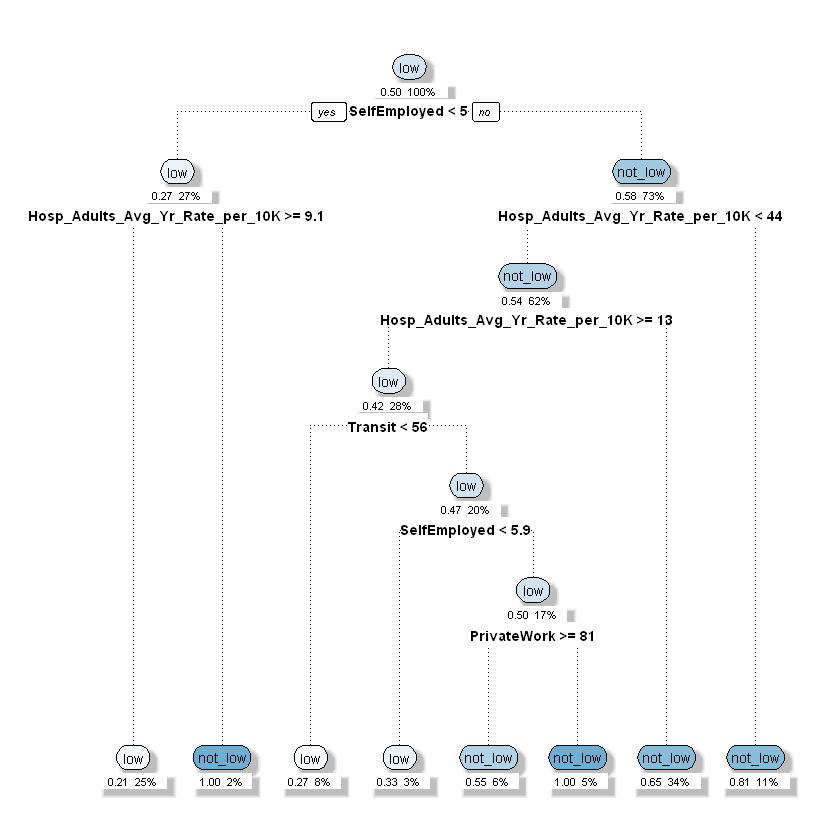

In [5]:
rpart.plot(cart_1, yesno=1, fallen.leaves=TRUE, under = TRUE, box.palette = "Blues", branch.lty = 3, shadow.col = "gray")

#### Predictive accuracy, confusion matrix and other model performance evluation

In [6]:
#Prediction accuracy
predicted_bin= predict(cart_1,agg_data, type = "class")
mean(predicted_bin == agg_data$density_bins) 

[1] 0.6914894

In [7]:
confusion_matrix <- table(predicted = predicted_bin, actual = agg_data$density_bins)
confusion_matrix

precision <- confusion_matrix[2,2]/sum(confusion_matrix[2,]) #precision - 0.65
precision

recall <- confusion_matrix[2,2]/sum(confusion_matrix[,2]) #recall - 0.829787234042553
recall

F1score <- 2 * ((precision * recall)/(precision + recall)) #F1 score - 0.728971962616822
F1score

         actual
predicted low not_low
  low      52      16
  not_low  42      78

[1] 0.65

[1] 0.8297872

[1] 0.728972

#### Now trying the model using partitioned data

In [8]:
set.seed(266)
sampling_vector <- createDataPartition(agg_data$density_bins, p = 0.80, list = FALSE)
agg_data_train <- agg_data[sampling_vector,]
agg_data_test <- agg_data[-sampling_vector,]

cart_2 <- rpart(density_bins ~ SelfEmployed + Hosp_Adults_Avg_Yr_Rate_per_10K + Construction + Production + Transit + IncomePerCap + Professional+ PrivateWork,
                data = agg_data_train, control = rpart.control(minsplit = 3, xval = 0, cp = 0.035))

summary(cart_2)

Call:
rpart(formula = density_bins ~ SelfEmployed + Hosp_Adults_Avg_Yr_Rate_per_10K + 
    Construction + Production + Transit + IncomePerCap + Professional + 
    PrivateWork, data = agg_data_train, control = rpart.control(minsplit = 3, 
    xval = 0, cp = 0.035))
  n= 152 

          CP nsplit rel error
1 0.26315789      0 1.0000000
2 0.05263158      1 0.7368421
3 0.03947368      3 0.6315789
4 0.03500000      8 0.4342105

Variable importance
Hosp_Adults_Avg_Yr_Rate_per_10K                    SelfEmployed 
                             29                              25 
                    PrivateWork                         Transit 
                             15                              13 
                   Construction                    IncomePerCap 
                             10                               4 
                   Professional                      Production 
                              2                               2 

Node number 1: 152 observations

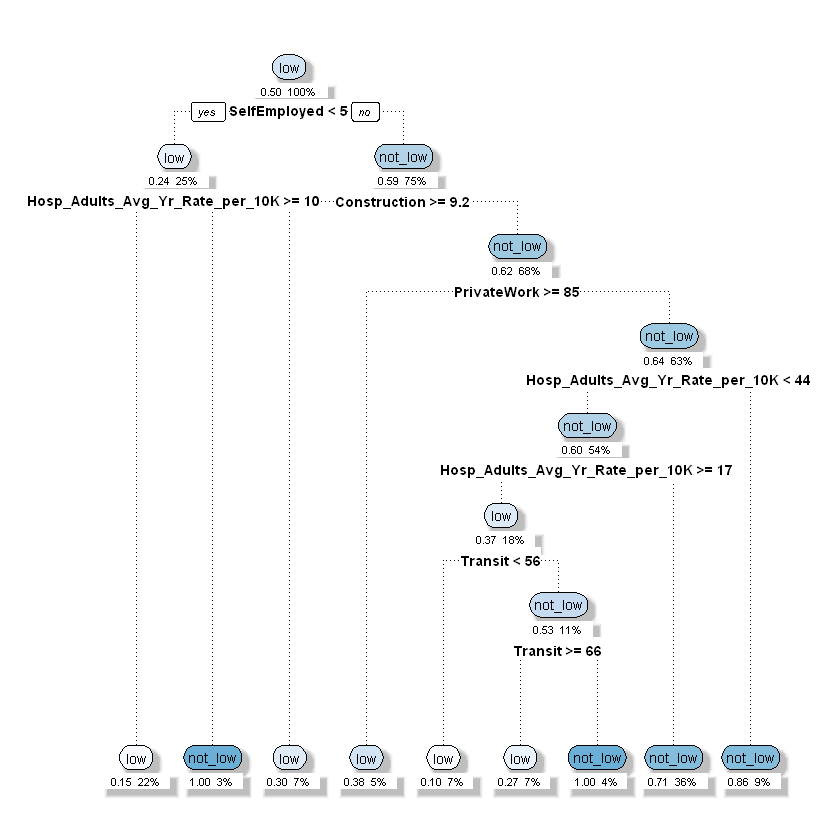

In [9]:
rpart.plot(cart_2, yesno=1, fallen.leaves=TRUE, under = TRUE, box.palette = "Blues", branch.lty = 3, shadow.col = "gray")

#### Test and Train accuracies

In [10]:
#Train prediction accuracy
predicted_bin= predict(cart_2,agg_data_train, type = "class")
mean(predicted_bin == agg_data_train$density_bins) 

#Test prediction accuracy
predicted_bin= predict(cart_2,agg_data_test, type = "class")
mean(predicted_bin == agg_data_test$density_bins) 

[1] 0.7828947

[1] 0.5833333

#### Prediction Performance Evaluation

In [11]:
#Confusion Matrix, etc.
confusion_matrix <- table(predicted = predicted_bin, actual = agg_data_test$density_bins)
confusion_matrix

precision <- confusion_matrix[2,2]/sum(confusion_matrix[2,]) #precision - 0.65
precision

recall <- confusion_matrix[2,2]/sum(confusion_matrix[,2]) #recall - 0.829787234042553
recall

F1score <- 2 * ((precision * recall)/(precision + recall)) #F1 score - 0.728971962616822
F1score

         actual
predicted low not_low
  low      12       9
  not_low   6       9

[1] 0.6

[1] 0.5

[1] 0.5454545

## Conclusions

While the performance of the model is not great considering how the data was binned, we can learn important things about the data based on how the decision tree is formed. For example, we can get a sense of the important variables in predicting the outcome and potential thresholds for continuous variables. 

One of the main findings is that "self-employed" cut-off at 5 seems to be an important variable and threshold in predicting tree density. 